# 修改组织边界
在对物体团块（如类器官中的细胞）进行分割时，可能会出现与背景相接的组织边缘处的细胞分割不当的情况。为了只修改这些细胞，对标签图像进行后处理，仅修改靠近背景的物体边界可能是有意义的。

In [1]:
import pyclesperanto_prototype as cle

# import a function from a file in the same folder
from simulated_cell_clumb import simulate_data

为了演示，我们模拟一个细胞团块。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
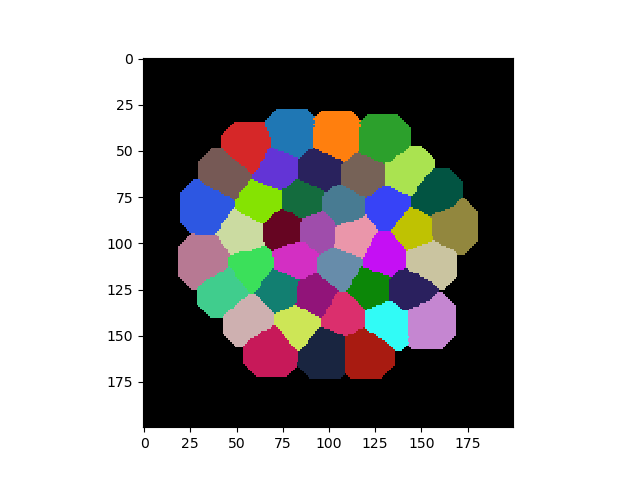

In [2]:
cells = simulate_data()
cells

我们可以像处理二值图像一样腐蚀整个标签场，同时保持像素的标签。通过这种方式，只有与背景相邻的标签会被修改。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
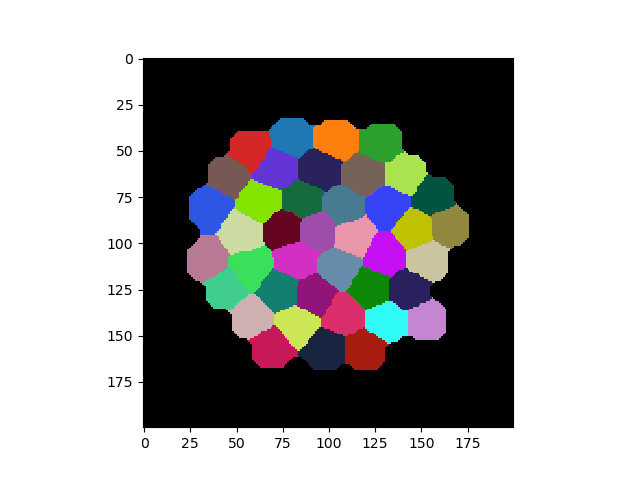

In [3]:
eroded_cells = cle.erode_connected_labels(cells, radius=5)
eroded_cells

仅作比较，这与标签腐蚀有何不同：

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
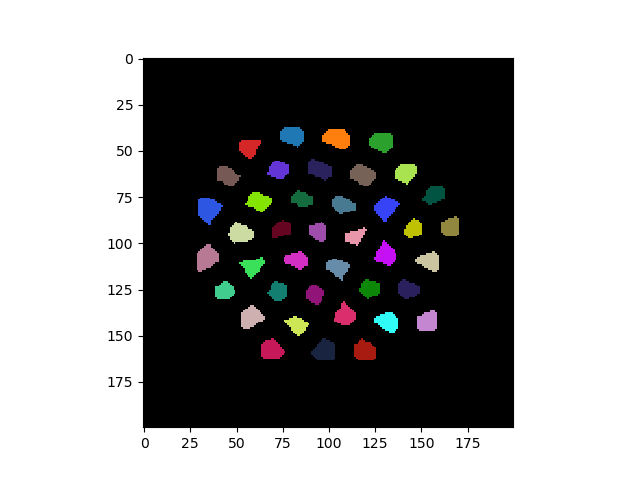

In [4]:
eroded_cells2 = cle.erode_labels(eroded_cells, radius=5)
eroded_cells2